In [1]:
# 检查torch的安装以及gpu的使用
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# 检查MMDetection的安装
import mmdet
print(mmdet.__version__)

# 检查mmcv的安装
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.11.0 True
2.23.0
11.3
MSVC 192930140


In [7]:
from PIL import Image
Image.open('demo/demo.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'demo/demo.jpg'

In [ ]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# 根据colab状态设置device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# 选择模型对应的配置文件
config = 'configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
# 选择下载好的checkpoint
checkpoint = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'
# 初始化模型
model = init_detector(config, checkpoint, device=device)
# 查看 Faster-RCNN 模型的结构
for name, module in model.named_children():
    print(name)
    [print(F'    {n}') for n, _ in module.named_children()]


load checkpoint from local path: checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
backbone
    conv1
    bn1
    relu
    maxpool
    layer1
    layer2
    layer3
    layer4
neck
    lateral_convs
    fpn_convs
rpn_head
    loss_cls
    loss_bbox
    rpn_conv
    rpn_cls
    rpn_reg
roi_head
    bbox_roi_extractor
    bbox_head


In [ ]:
img = 'demo/demo.jpg'
result = inference_detector(model, img)
pass

d:\wolftail\repos\sources\mmdetection\mmdet\datasets\utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


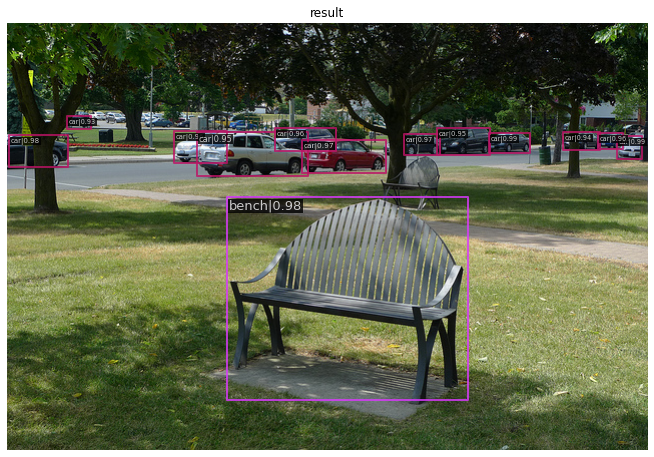

In [ ]:
show_result_pyplot(model, img, result, score_thr=0.9)

In [ ]:
# rpn 网络
rpn_config = 'configs/rpn/rpn_r50_fpn_1x_coco.py'
rpn_checkpoint = 'checkpoints/rpn_r50_fpn_1x_coco_20200218-5525fa2e.pth'
rpn_model = init_detector(rpn_config, rpn_checkpoint, device=device)

load checkpoint from local path: checkpoints/rpn_r50_fpn_1x_coco_20200218-5525fa2e.pth


In [ ]:
img = 'demo/demo.jpg'
rpn_result = inference_detector(rpn_model, img)
pass

In [ ]:
import cv2
# from google.colab.patches import cv2_imshow
# cv2.imshow = lambda x, y: cv2_imshow(y)
# cv2.getWindowProperty = lambda *args, **kwargs: 0

rpn_model.show_result(img, rpn_result)